<a href="https://colab.research.google.com/github/pchernic/python_for_financial_data/blob/main/Portfolio_Optimization_and_Efficient_Frontier_with_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markowitz with Python

## Description and Goals:

---


This  Notebook contains Python code for portfolio optimization and the visualization of the efficient frontier. The efficient frontier represents a set of investment portfolios that achieve the optimal trade-off between expected return and risk (volatility). The key steps in this notebook include:

1. **Data Retrieval:** The code downloads historical stock price data for a selected set of stocks from Yahoo Finance, defines the date range for analysis, and calculates logarithmic returns.

2. **Portfolio Simulation:** It simulates a large number of random portfolios by generating random weights for each stock in the portfolio. For each portfolio, it calculates the expected return, volatility (risk), and Sharpe ratio, assuming a risk-free rate of 0%.

3. **Optimal Portfolio:** The code identifies the portfolio with the highest Sharpe ratio, which represents the optimal portfolio from a risk-adjusted perspective.

4. **Efficient Frontier:** It computes and plots the efficient frontier, which shows the range of portfolios that offer different levels of expected return for varying levels of risk.

5. **Visualization:** The results are visualized using Matplotlib, including a scatter plot of portfolios with color-coded Sharpe ratios, a highlighted point for the optimal portfolio, and the efficient frontier curve.

**Goal:**

This notebook aims to be a valuable tool for investors and finance enthusiasts interested in portfolio optimization. By analyzing the efficient frontier, users can make informed decisions about constructing investment portfolios that align with their risk tolerance and return objectives.

**Dependencies:**

- yfinance
- numpy
- matplotlib
- pandas
- scipy

---


##Libraries

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.ticker as mtick

### Defining date range:

In [4]:
# Define the start and end dates for data analysis
start_date = dt.date(2015, 1, 1)
end_date = dt.date(2022, 12, 31)

### Portfolio Example

In [5]:
# Define a list of stock symbols
stock_symbols = ["AAPL", "NKE", "GOOGL", "AMZN"]

# Download adjusted closing prices for the selected stocks
stock_prices = yf.download(stock_symbols, start_date, end_date)['Adj Close']


[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,NKE
Date,,,,
2015-01-02,24.498680,15.426000,26.477501,43.225182
2015-01-05,23.808516,15.109500,25.973000,42.529243
2015-01-06,23.810755,14.764500,25.332001,42.279057
2015-01-07,24.144636,14.921000,25.257500,43.152393
2015-01-08,25.072327,15.023000,25.345501,44.148533
...,...,...,...,...
2022-12-23,131.299820,85.250000,89.230003,115.152916
2022-12-27,129.477585,83.040001,87.389999,116.450554
2022-12-28,125.504539,81.820000,86.019997,113.894913


### Getting Returns
  - Building Log Return Matrix
  - Getting Mean Returns.
  - Building A Covariance Matrix of Log Returns.
  - Displaying mean returns.  

In [6]:
# Calculate logarithmic returns and drop NaN values
log_returns = stock_prices.pct_change().apply(lambda x: np.log(1+x)).dropna()

# Calculate the mean (average) of logarithmic returns
mean_returns = log_returns.mean()

# Calculate the covariance matrix of logarithmic returns
covariance_matrix = log_returns.cov()

# Display the mean returns
mean_returns


AAPL     0.000827
AMZN     0.000842
GOOGL    0.000598
NKE      0.000490
dtype: float64

In [7]:
#covariance matrix of logarithmic returns

covariance_matrix

,AAPL,AMZN,GOOGL,NKE
AAPL,0.000356,0.000232,0.000216,0.000172
AMZN,0.000232,0.000436,0.000247,0.000164
GOOGL,0.000216,0.000247,0.000316,0.000165
NKE,0.000172,0.000164,0.000165,0.000348


### Monte Carlo Portfolio Optimization Simulation


1. **Monte Carlo**: This part refers to the use of the Monte Carlo simulation technique, which involves generating random scenarios to analyze and make decisions based on statistical outcomes.

2. **Portfolio Optimization**: This part indicates that the code is focused on optimizing investment portfolios, typically by finding the allocation of assets that maximizes returns or minimizes risk.

3. **Simulation**: This part signifies that the code is running simulations to assess various portfolio scenarios.


This code simulates a specified number of portfolios with random weightings of the selected stocks and calculates their expected returns, volatilities, and Sharpe ratios. It also stores the weights of each stock for each portfolio in the weights_table.

In [8]:
# Number of portfolios to simulate
number_of_portfolios = 100000

# Initialize arrays to store portfolio metrics
expected_returns = np.zeros(number_of_portfolios)
expected_volatilities = np.zeros(number_of_portfolios)
sharpe_ratios = np.zeros(number_of_portfolios)
weights_table = np.zeros((number_of_portfolios, len(stock_symbols)))

# Loop to generate random portfolios
for k in range(number_of_portfolios):

    # Generate random weights for each stock in the portfolio
    weights = np.random.random(len(stock_symbols))
    weights /= np.sum(weights)  # Ensure the sum of weights is 1 (100%)

    # Store the weights in the weights table
    weights_table[k, :] = weights

    # Calculate the expected portfolio return (annualized)
    expected_returns[k] = np.sum(mean_returns * weights * 252)

    # Calculate the expected portfolio volatility (annualized)
    expected_volatilities[k] = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix * 252, weights)))

    # Calculate the Sharpe ratio for the portfolio
    sharpe_ratios[k] = expected_returns[k] / expected_volatilities[k]


#### Understanding sharp_ratios:

In [12]:
# Sharpe Formula
import sympy as sp
from IPython.display import display, Markdown

# Define symbols
PR, RF, PV = sp.symbols('Portfolio_Return Risk-Free_Rate Portfolio_Volatility')

# Create the Sharpe ratio equation
sharpe_eq = sp.Eq((PR - RF) / PV, PR)

# Display the equation as Markdown
display(Markdown(f"$$ {sp.latex(sharpe_eq)} $$"))


$$ \frac{Portfolio_{Return} - Risk-Free_{Rate}}{Portfolio_{Volatility}} = Portfolio_{Return} $$

The Sharpe ratio is a key metric used in finance to assess the risk-adjusted performance of an investment portfolio. It provides insight into whether the returns earned on an investment are sufficient given the level of risk taken. The Sharpe ratio is calculated as:


In your array of Sharpe ratios, each value represents the Sharpe ratio for a specific portfolio configuration. Here's how to interpret these values:

1. **Positive Values**: A Sharpe ratio greater than zero indicates that the portfolio is generating a positive excess return (return above the risk-free rate) for each unit of risk. In finance, this is generally considered a good sign.

2. **Magnitude**: The magnitude of the Sharpe ratio matters. Higher values typically indicate better risk-adjusted performance. A higher Sharpe ratio implies that the portfolio is delivering more return for the same level of risk or less risk for the same level of return.

3. **Comparison**: You can use Sharpe ratios to compare different portfolios. When comparing two portfolios, the one with the higher Sharpe ratio is usually preferred because it offers a better risk-adjusted return.

4. **Risk-Free Rate**: Keep in mind that the Sharpe ratio subtracts the risk-free rate from the portfolio return. So, if the risk-free rate is low or close to zero, achieving a positive Sharpe ratio becomes more achievable.



In [9]:
sharpe_ratios

array([0.71125649, 0.71513559, 0.68632062, ..., 0.72511646, 0.71587333,
       0.67919868])

## Finding the Optimal Portfolio with Maximum Sharpe Ratio

In [13]:
# Find the index of the maximum Sharpe ratio
max_sharpe_index = sharpe_ratios.argmax()

# Retrieve the allocation of assets for the portfolio with the highest Sharpe ratio
best_portfolio_weights = weights_table[max_sharpe_index]


### Calculating Expected Arithmetic Returns Table



In [14]:
# Calculate the table of expected arithmetic returns
table_expected_arithmetic_returns = np.exp(expected_returns) - 1

# Display the table of expected arithmetic returns
table_expected_arithmetic_returns


array([0.20784962, 0.19394952, 0.1816216 , ..., 0.19765199, 0.20317788,
       0.18390218])

## Calculating the Efficient Frontier for Portfolio Optimization

The code is designed to calculate the Efficient Frontier, which is a fundamental concept in portfolio optimization. **The Efficient Frontier represents a set of optimal portfolios that offer the highest expected return for a given level of risk (volatility) or the lowest risk for a given level of expected return.**



In [40]:
# Define the range of expected arithmetic returns
efficient_frontier_y = np.linspace(table_expected_arithmetic_returns.min(),
                                   table_expected_arithmetic_returns.max(), 50)

def get_return(weight_test):
    weight_test = np.array(weight_test)
    portfolio_return = np.sum(mean_returns * weight_test) * 252
    portfolio_return = np.exp(portfolio_return) - 1

    return portfolio_return

def check_weight_sum(weight_test):
    return np.sum(weight_test) - 1

def get_volatility(weight_test):
    weight_test = np.array(weight_test)
    portfolio_volatility = np.sqrt(np.dot(weight_test.T, np.dot(covariance_matrix * 252, weight_test)))

    return portfolio_volatility

initial_weights = [1/len(stock_symbols)] * len(stock_symbols)
limits = tuple([(0, 1) for ativo in lista_acoes])



limits = [(0, 1) for _ in range(len(stock_symbols))]

efficient_frontier_x = []

for possible_return in efficient_frontier_y:

    # Find the portfolio with the minimum volatility for each possible return

    equality_constraints = ({'type':'eq', 'fun':check_weight_sum},
            {'type':'eq', 'fun': lambda w: get_return(w) - possible_return})


    result = minimize(get_volatility, initial_weights, method='SLSQP', bounds=limits,
                      constraints=equality_constraints)
    efficient_frontier_x.append(result.fun)

In this part of your code, you are defining and calculating the efficient frontier of portfolios based on expected arithmetic returns and portfolio volatility. Here's what each section of this code does:

1. `efficient_frontier_y`: It defines a range of expected arithmetic returns (`efficient_frontier_y`) that spans from the minimum to the maximum expected arithmetic returns calculated earlier. This range will be used to explore various possible expected returns for portfolios.

2. `get_return(weight_test)`: This function calculates the portfolio return based on the given portfolio weights. It uses the mean returns of individual stocks and annualizes the return by multiplying it by 252 (assuming 252 trading days in a year).

3. `check_weight_sum(weight_test)`: This function checks if the sum of portfolio weights equals 1 (100%). It is used as a constraint to ensure that the weights sum to 1.

4. `get_volatility(weight_test)`: This function calculates the portfolio volatility (risk) based on the given portfolio weights. It uses the covariance matrix of logarithmic returns and annualizes the volatility.

5. `initial_weights`: It defines initial weights for each asset, assuming an equal allocation.

6. `limits`: This variable defines the upper and lower bounds for the portfolio weights, which are between 0 and 1 (representing 0% to 100% allocation in each asset).

7. `efficient_frontier_x`: This empty list will store the portfolio volatilities for each expected return in the `efficient_frontier_y` range.

The loop iterates over each possible expected return in the `efficient_frontier_y` range and **aims to find the portfolio with the minimum volatility for that return.** It does this by minimizing the portfolio volatility while satisfying the constraint that the sum of weights equals 1 and that the expected return matches the current possible return being considered.



### Result breakdown

In [41]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.3041625556035382
       x: [ 2.021e-01  7.979e-01  3.400e-16  0.000e+00]
     nit: 4
     jac: [ 2.130e-01  3.273e-01  1.997e-01  1.369e-01]
    nfev: 20
    njev: 4

The result of the optimization process for a specific portfolio with a target expected return.

Here's an explanation of each part of this result message:

- `Optimization terminated successfully`: This message indicates that the optimization process completed without encountering any errors or issues.

- `success: True`: This field confirms that the optimization was successful.

- `status: 0`: The status code 0 typically indicates that the optimization converged to a solution.

- `fun:`: The value of `fun` represents the objective function value, which in this case is the portfolio volatility. The value is the minimum volatility achieved for the given portfolio.

- `x:`: The `x` field provides the optimized portfolio weights for each asset.

- `nit: `: `nit` represents the number of iterations it took for the optimization algorithm to converge to the solution. In this case, it took 4 iterations.

- `jac:`: The `jac` field provides the Jacobian matrix, which contains partial derivatives of the objective function with respect to the variables (weights). It is used in some optimization algorithms.

- `nfev: `: `nfev` represents the number of function evaluations performed during the optimization process.

- `njev: `: `njev` represents the number of Jacobian evaluations performed during the optimization process.

In summary, this result message **indicates that the optimization process successfully found a portfolio with the minimum volatility that matches the target expected return while satisfying the constraints.**

### Expected volatilities vs. Expected returns plot

- Expected volatilities vs. Expected returns for a set of portfolios and  the portfolio with the highest Sharpe ratio highlighted in red.


- The plot provides a visual representation of the trade-off between expected return and volatility for different portfolios and highlights the portfolio with the highest Sharpe ratio, which is often considered an optimal portfolio from a risk-adjusted perspective.

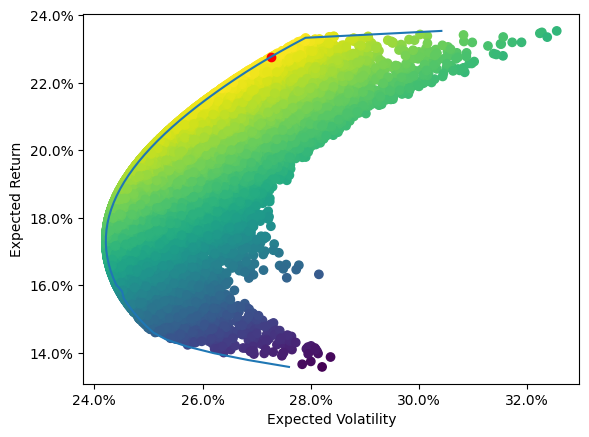

In [42]:

fig, ax = plt.subplots()

ax.scatter(expected_volatilities, table_expected_arithmetic_returns, c = sharpe_ratios)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
ax.scatter(expected_volatilities[max_sharpe_index],
            table_expected_arithmetic_returns[max_sharpe_index], c = "red")
ax.plot(efficient_frontier_x, efficient_frontier_y)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.show()